# Categorical Feature Encoding Challenge II

**Задача** - бинарной классификации. Соревнование ставит своей целью научить работать с категориальными признаками. Датасет содержит:
- Бинарные признаки
- Номинальные признаки с низкими и высокими мощностями
- Порядковые признаки с низкими и высокими мощностями
- (Потенциально) цикличные признаки

**Метрика** - сабмиты оцениваются по площади под кривой ROC между предсказанной вероятностью и реальной меткой. Для каждого id необходимо предсказать вероятность таргета.

## 1. EDA (Разведочный анализ данных, Exploratory data analysis)

In [1]:
import seaborn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

Считываем тренировочные данные:

In [4]:
train_data = pd.read_csv("data/train.csv", index_col="id")
test_data = pd.read_csv("data/test.csv", index_col="id")
print(f"Shape of train data: {train_data.shape}. Shape of test data: {test_data.shape}")

Shape of train data: (600000, 24). Shape of test data: (400000, 23)


In [5]:
train_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


### Описание признаков

In [6]:
train_data.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 24 columns):
bin_0     582106 non-null float64
bin_1     581997 non-null float64
bin_2     582070 non-null float64
bin_3     581986 non-null object
bin_4     581953 non-null object
nom_0     581748 non-null object
nom_1     581844 non-null object
nom_2     581965 non-null object
nom_3     581879 non-null object
nom_4     581965 non-null object
nom_5     582222 non-null object
nom_6     581869 non-null object
nom_7     581997 non-null object
nom_8     582245 non-null object
nom_9     581927 non-null object
ord_0     581712 non-null float64
ord_1     581959 non-null object
ord_2     581925 non-null object
ord_3     582084 non-null object
ord_4     582070 non-null object
ord_5     582287 non-null object
day       582048 non-null float64
month     582012 non-null float64
target    600000 non-null int64
dtypes: float64(6), int64(1), object(17)
memory usage: 114.4+ MB


#### Краткое описание признаков:
* **bin 0~4** : Binary Feature, label encoding
* **nom 0~9** : Nominal Feature
* **ord 0~5** : Ordinal Feature
* **day/month** : Date, cycle encoding

Создадим два списка признаков, соответствующие их группам: числовые и категориальные.

In [8]:
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'ord_6', 'ord_7']

### Анализируем целевую переменную

In [10]:
train_data['target'].describe()

count    600000.000000
mean          0.187205
std           0.390076
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

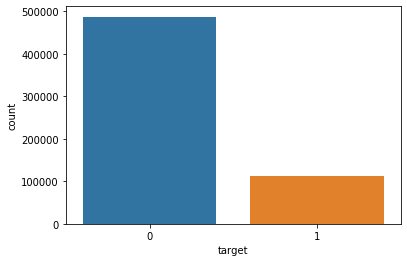

In [12]:
seaborn.countplot(x='target', data=train_data)

In [14]:
print ('Доля объектов с меткой 1 = {0:.3f}'.format(train_data.target.sum()/train_data.shape[0]))

Доля объектов с меткой 1 = 0.187


**Корелляция с признаками**

In [15]:
def print_percentage(df,col_name,col_values):
    for x in col_values:
        group = df.loc[df[col_name]==x]
        print ('{0} survival rate: {1:.3f}'.format(x, (group['target'].sum()/group.shape[0])))

In [16]:
def rand_jitter(arr,factor,limit):
    r = arr.max()-arr.min()
    stdev = factor*r
    arr = arr + np.random.randn(arr.shape[0]) * stdev
    arr = arr.clip(arr.min()-limit,arr.max()+limit)
    return arr

**Бинарные**

**Номинальные**

**Порядковые**

### Анализ признаков

**Пропуски в данных**

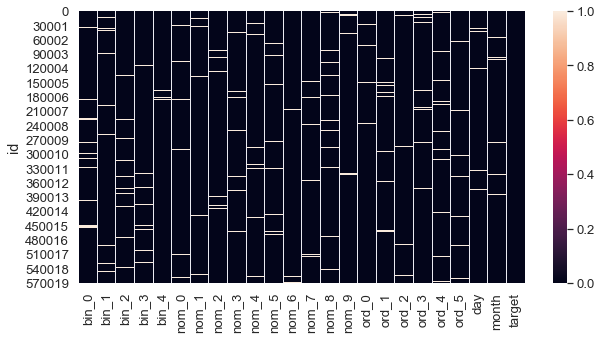

In [46]:
plt.figure(figsize=(10,5))
seaborn.heatmap(train_data.isnull());

**Добавить таблицу с количеством пропусков по фичам!!!**

**Обзор признаков**

In [24]:
# seaborn.pairplot(train_data, hue="target")

**Проверяем наличие выбросов**

**Строим матрицу корреляции признаков между собой**

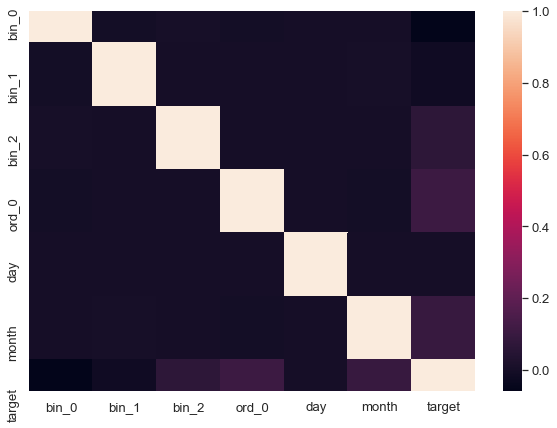

In [31]:
plt.figure(figsize=(10,7))
corrmat = train_data.corr()
seaborn.heatmap(corrmat,
               xticklabels=corrmat.columns.values, 
                yticklabels=corrmat.columns.values)

### Density plot of numeric features

Now, I want to investigate numeric features first, using seaborn's distribution plot module

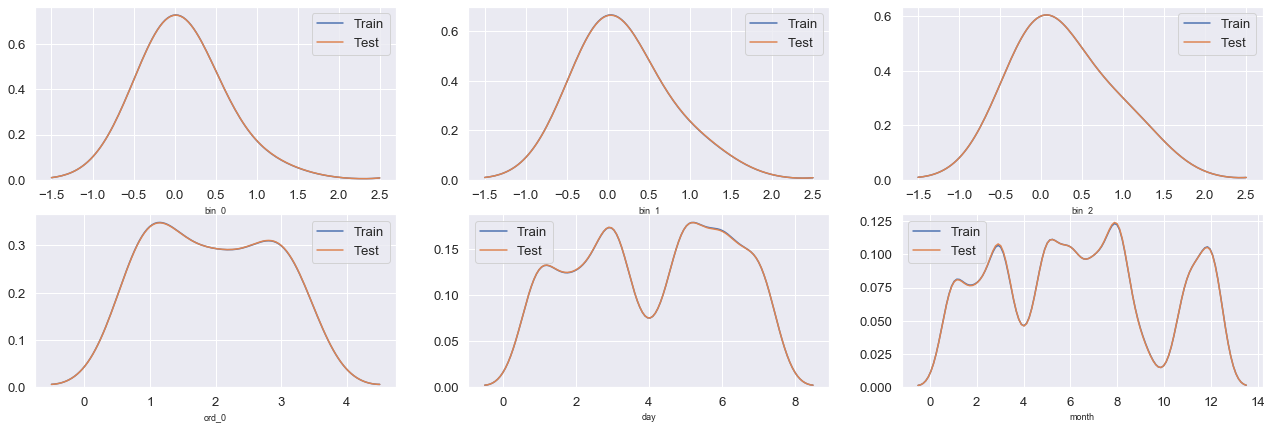

In [39]:
num_cols = test_data.select_dtypes(exclude=['object']).columns
fig, ax = plt.subplots(2,3,figsize=(22,7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    plt.xlabel(col, fontsize=9)
    seaborn.kdeplot(train_data[col].values, bw=0.5,label='Train')
    seaborn.kdeplot(test_data[col].values, bw=0.5,label='Test')
   
plt.show() 

Wow, the patterns in both train and test set are almost the same in 5 numeric features, which mean that if I have a good enough model ( good performance on the training set) it seem not to find difficulty in generalization ( i.e archives relatively good performance in the test set)

The train and test data are generated by a probability distribution over datasets called the data generating process. We typically make a set of assumptions known collectively as the i.i.d. assumptions. These assumptions are that the examples in each dataset are independent from each other, and that the train set and test set are identically distributed, drawn from the same probability distribution as each other. This assumption allows us to describe the data generating process with a probability distribution over a single example. The same distribution is then used to generate every train example and every test example (Ian Goodfellow)

We will have greater insight with others plot for separate distribution visualization for samples with target value 0 and 1.

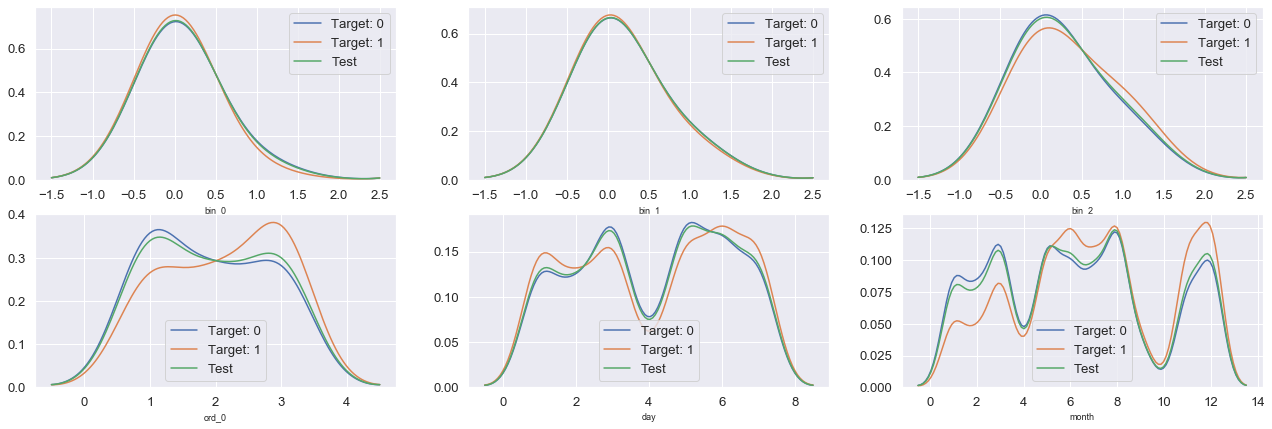

In [41]:
target0 = train_data.loc[train_data['target'] == 0]
target1 = train_data.loc[train_data['target'] == 1]

fig, ax = plt.subplots(2,3,figsize=(22,7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    plt.xlabel(col, fontsize=9)
    seaborn.kdeplot(target0[col].values, bw=0.5,label='Target: 0')
    seaborn.kdeplot(target1[col].values, bw=0.5,label='Target: 1')
    seaborn.kdeplot(test_data[col].values, bw=0.5,label='Test')
    
plt.show() 

These 3 patterns are almost the same, except from the case of ord_1 and month features, the 1-target class has a slightly different distribution. That means, similar to the train data set, there will be an overwhelming number of 1-target samples compare to the rest

### Бинарные признаки

In [ ]:
# Бинарные
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']
# Категориальные
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
# Хеш
hex_features = ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']
# Порядковые
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']
# Цикличные
cyc_features = ['day', 'month']

### Бинарные признаки

In [ ]:
# https://www.kaggle.com/warkingleo2000/first-step-on-kaggle
# https://www.kaggle.com/subinium/categorical-data-eda-visualization

### Временные признаки

In [ ]:
# https://www.kaggle.com/warkingleo2000/first-step-on-kaggle
# https://www.kaggle.com/subinium/categorical-data-eda-visualization

### Номинальные признаки

In [42]:
# https://www.kaggle.com/warkingleo2000/first-step-on-kaggle
# https://www.kaggle.com/subinium/categorical-data-eda-visualization

### Порядковые признаки

In [ ]:
# https://www.kaggle.com/warkingleo2000/first-step-on-kaggle
# https://www.kaggle.com/subinium/categorical-data-eda-visualization